# Chapter 05 데이터 시각화 하기

1. 파이썬의 대표적인 시각화 라이브러리 맷플롯립의 사용방법 배우기
2. 맷플롯립 사용해서 선 그래프와 막대 그래프 그리기

## 05-1 맷플롯립 기본 요소 알아보기

### Figure 객체
맷플롯립에는 Figure라고 불리는 모든 그래프 구성요소를 담고 있는 최상위 객체가 있다. 
scatter()로 산점도를 그릴 때 자동으로 피겨 객체가 생성된다.


In [1]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


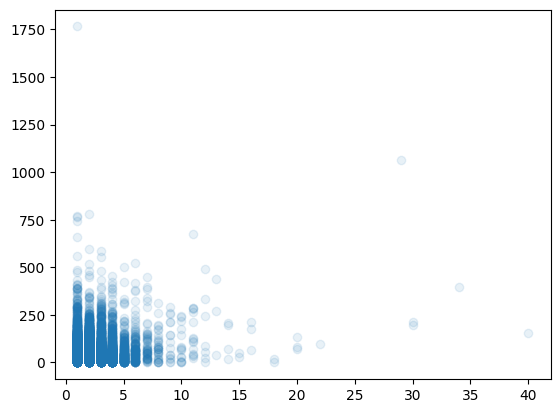

In [2]:
import matplotlib.pyplot as plt

plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) # x축 도서권수 y축 대출건수
plt.show()

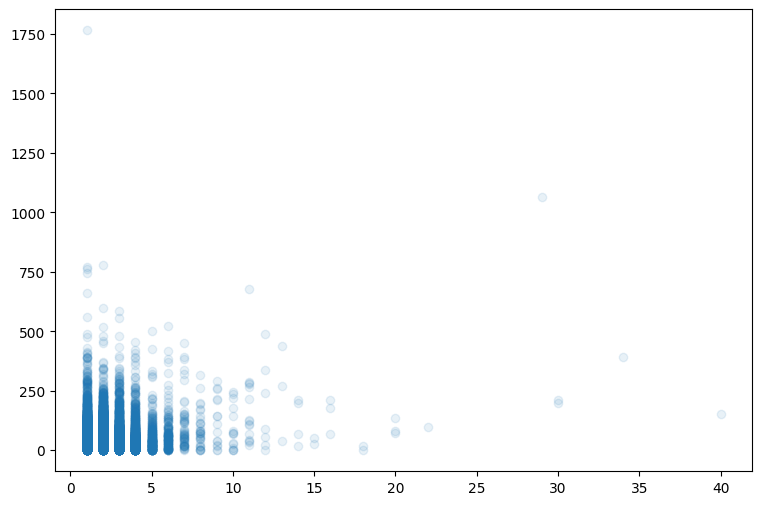

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) # x축 도서권수 y축 대출건수
plt.show()

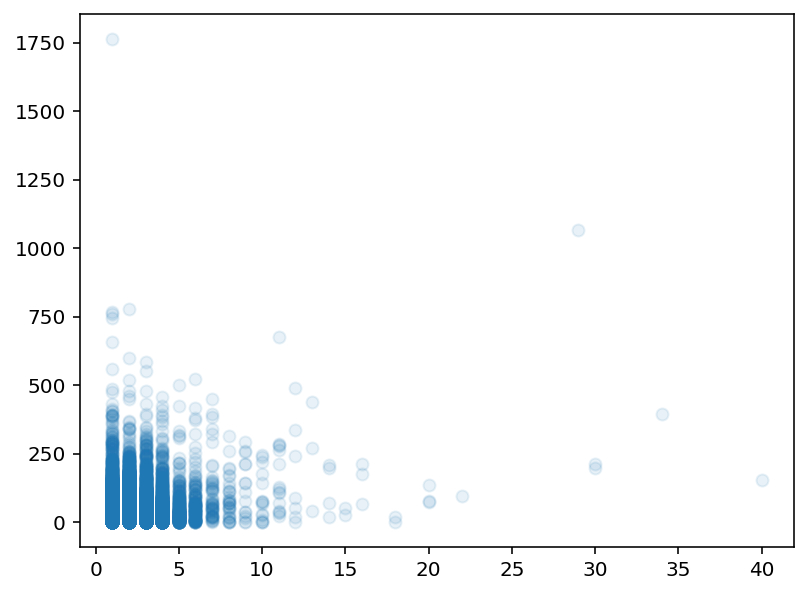

In [4]:
plt.figure(dpi=144) # 그래프 더 크게 그리기
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) # x축 도서권수 y축 대출건수
plt.show()

### raParams 객체
맷플롯립의 그래프의 기본값을 관리하는 객체

In [5]:
# DPI 기본값 바꾸기 
plt.rcParams['figure.dpi'] = 100

In [7]:
# 산점도 마커 모양 바꾸기
plt.rcParams['scatter.marker']

'o'

In [8]:
plt.rcParams['scatter.marker'] = '*'

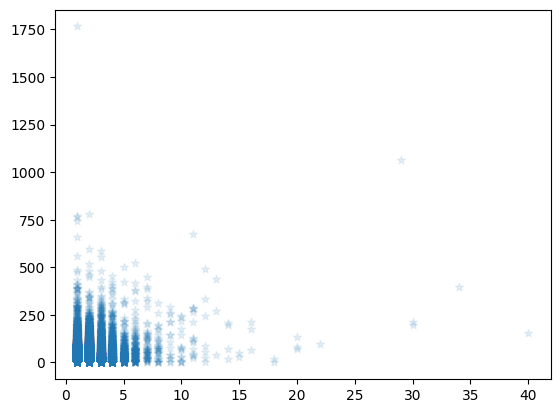

In [9]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) # x축 도서권수 y축 대출건수
plt.show()

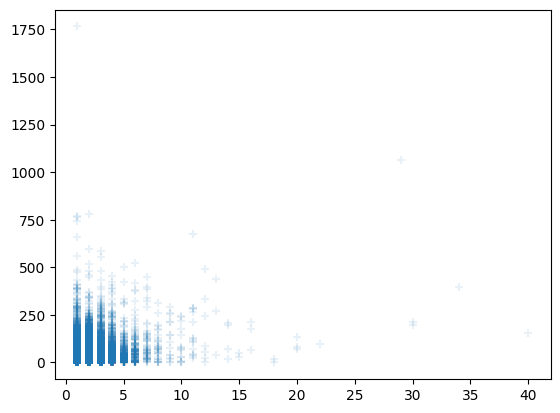

In [10]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1, marker='+') # 마커 모양 변경
plt.show()

### 여러개의 서브플롯 출력하기
하나의 피겨 객체 안에 여러 개의 서브플롯을 담을 수 있다. 
서브플롯이란 맷플롯립의 Axes 클래스의 객체를 말하며 하나의 서브플롯은 2개 이상의 축을 포함한다. 


C:\Users\dasap\AppData\Local\Temp\ipykernel_30452\386647535.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


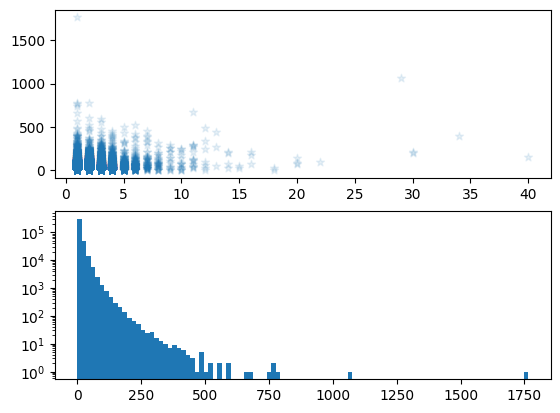

In [12]:
# 서브플롯 그리기
fig, axs = plt.subplots(2)

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')

fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_30452\2696231411.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


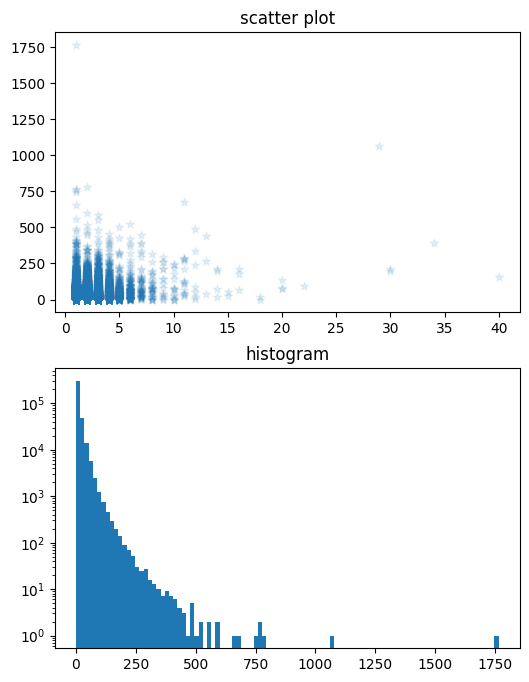

In [13]:
fig, axs = plt.subplots(2, figsize=(6,8))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')
axs[1].set_title('histogram')

fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_30452\459801824.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


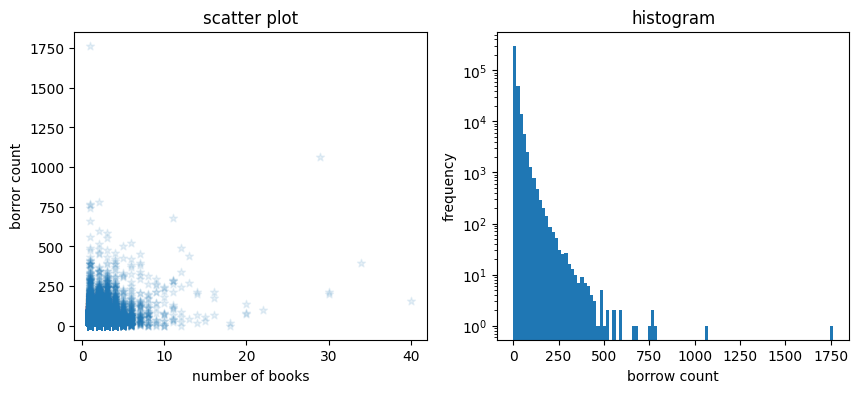

In [14]:
# 서브플롯을 가로로 나란히 출력하기 
fig, axs = plt.subplots(1,2,figsize=(10,4)) # 1개의 행, 2개의 열을 가진 서브플롯

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borror count')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')
axs[1].set_title('histogram')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

fig.show()

## 05-2 선 그래프와 막대 그래프 그리기

### 연도별 발행 도서 개수 구하기

In [15]:
import pandas as pd
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [17]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

발행년도
2012.0    18601
2014.0    17797
2009.0    17611
2011.0    17523
2010.0    17503
          ...  
2650.0        1
2108.0        1
2104.0        1
2560.0        1
1947.0        1
Name: count, Length: 87, dtype: int64

In [18]:
count_by_year = count_by_year.sort_index()
count_by_year

발행년도
1947.0     1
1948.0     1
1949.0     1
1952.0    11
1954.0     1
          ..
2551.0     1
2552.0     2
2559.0     1
2560.0     1
2650.0     1
Name: count, Length: 87, dtype: int64

In [19]:
# 2030년보다 작거나 같은 데이터만 뽑기
count_by_year = count_by_year[count_by_year.index <= 2030]
count_by_year

발행년도
1947.0        1
1948.0        1
1949.0        1
1952.0       11
1954.0        1
          ...  
2020.0    11834
2021.0     1255
2025.0        1
2028.0        1
2030.0        1
Name: count, Length: 68, dtype: int64

### 주제별 도서 개수 구하기

In [20]:
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]
    
count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

주제분류번호
8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: count, dtype: int64

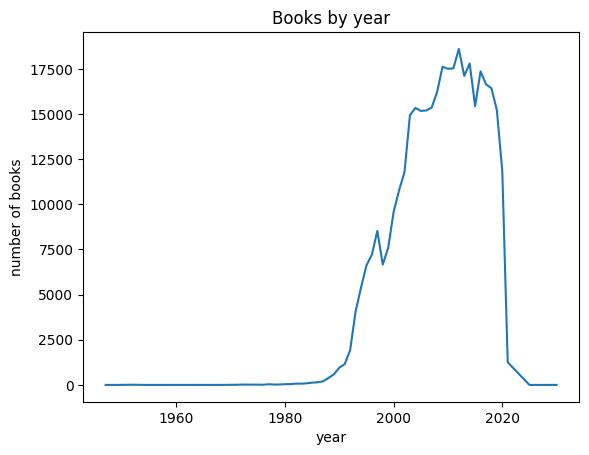

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

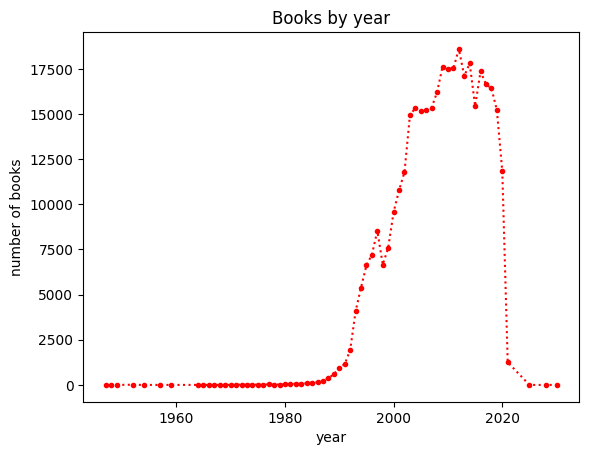

In [22]:
# 선 모양과 색상 바꾸기

plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

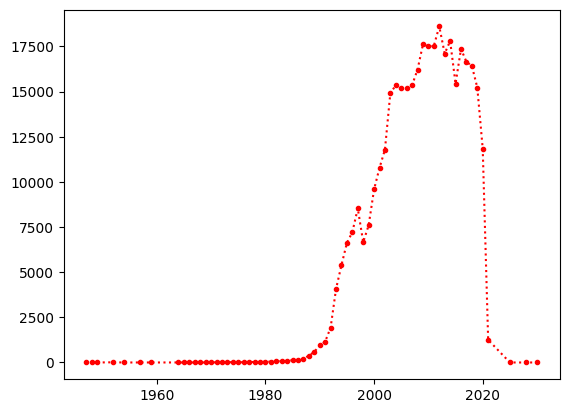

In [23]:
# 축약해서 쓰기

plt.plot(count_by_year, '.:r')


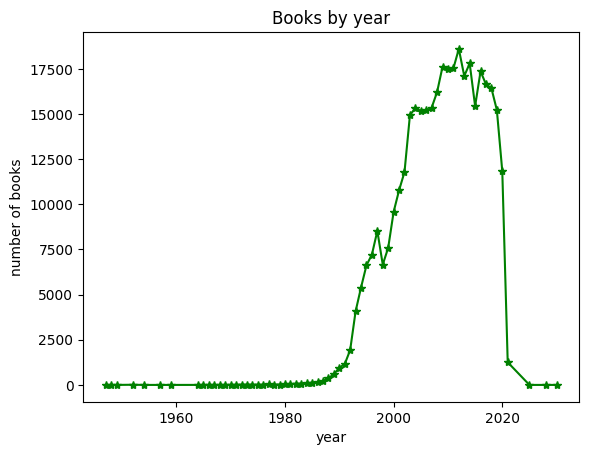

In [24]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

In [26]:
count_by_year[::5]

발행년도
1947.0        1
1957.0        1
1967.0        1
1972.0       20
1977.0       38
1982.0       72
1987.0      197
1992.0     1932
1997.0     8528
2002.0    11783
2007.0    15352
2012.0    18601
2017.0    16644
2025.0        1
Name: count, dtype: int64

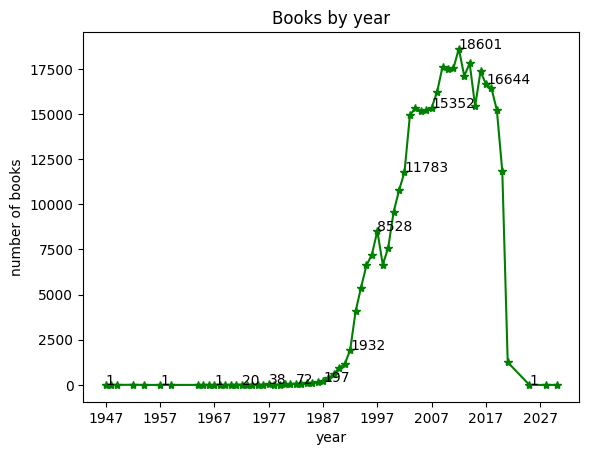

In [27]:
# 선 그래프 눈금 개수 조절 및 마커에 텍스트 표시하기
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1947,2030,10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val))

plt.show()



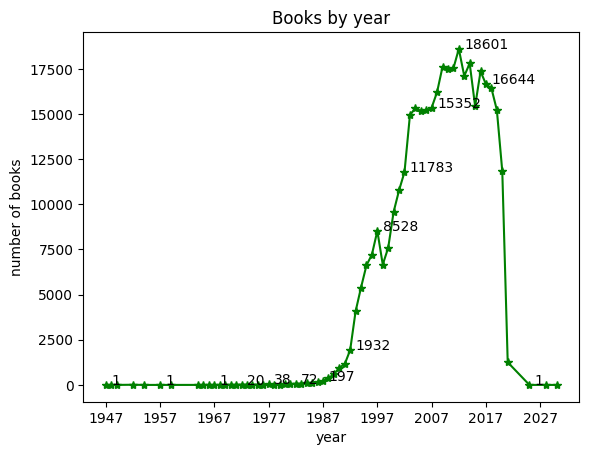

In [28]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1947,2030,10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(idx+1, val+10)) # 텍스트 위치 조금 떼어놓기

plt.show()


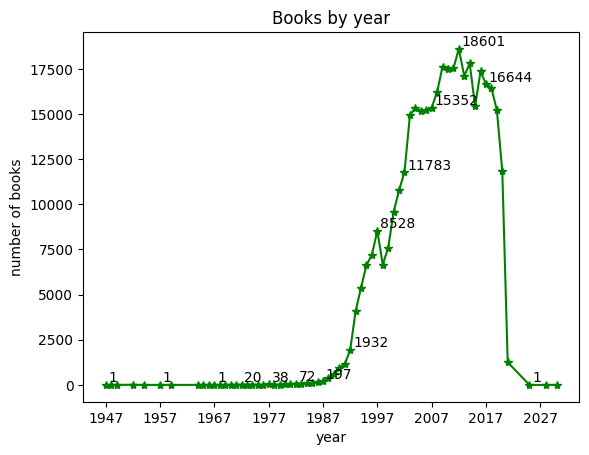

In [29]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1947,2030,10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(2,2), textcoords='offset points')

plt.show()


### 막대 그래프 그리기 

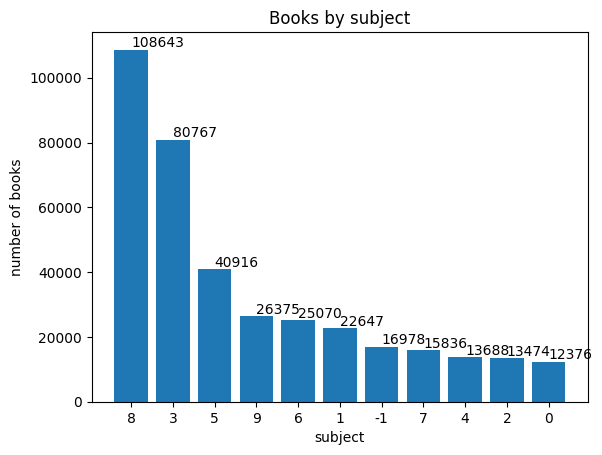

In [30]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points')

plt.show()

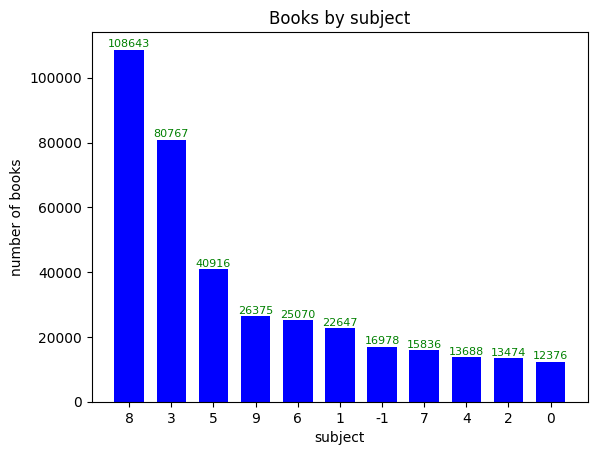

In [32]:
# 텍스트 정렬, 막대 조절 및 색상 바꾸기

plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points', fontsize=8, ha='center', color='green')

plt.show()

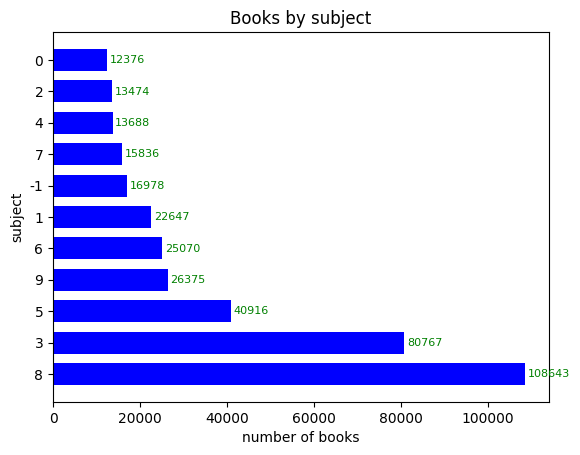

In [38]:
# 가로 막대 그래프 그리기
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')

for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2,0), textcoords='offset points', fontsize=8, va='center', color='green')

plt.show()


### 이미지 출력하고 저장하기

In [45]:
img = plt.imread('./jupyter.png')
img.shape

(163, 190, 4)

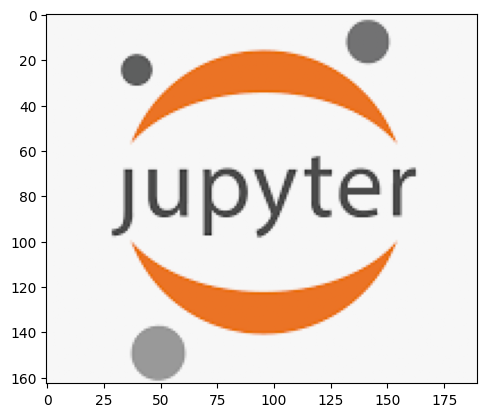

In [48]:
plt.imshow(img)
plt.show()

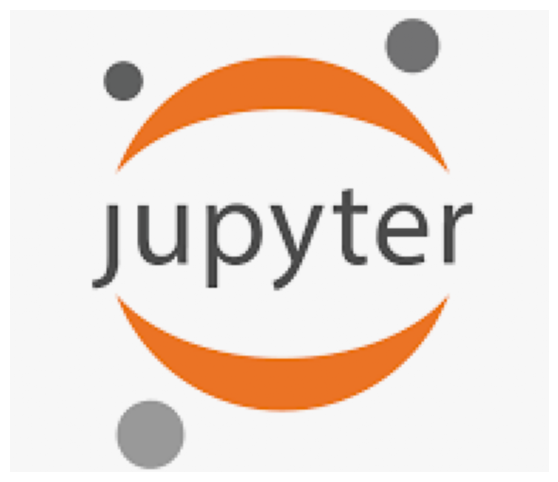

In [49]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off') # 눈금 출력 x
plt.show()

In [51]:
# 이미지 저장하기
plt.imsave('jupyter.jpg', img)

### 그래프를 이미지로 저장하기

In [52]:
plt.rcParams['savefig.dpi']


'figure'

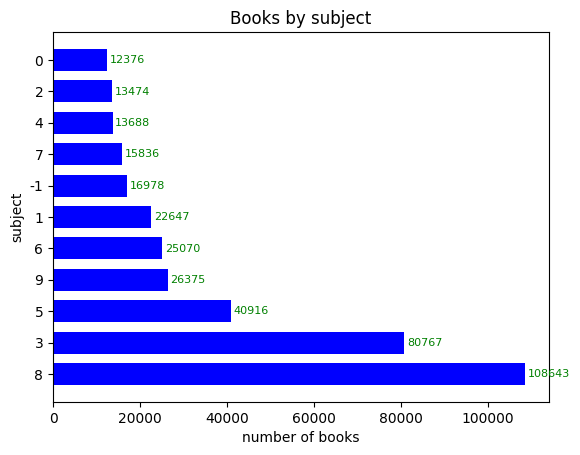

In [53]:
# 가로 막대 그래프 그리기
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')

for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2,0), textcoords='offset points', fontsize=8, va='center', color='green')

plt.savefig('books_by_subject.png')
plt.show()


In [54]:
from PIL import Image
pil_img = Image.open('books_by_subject.png')

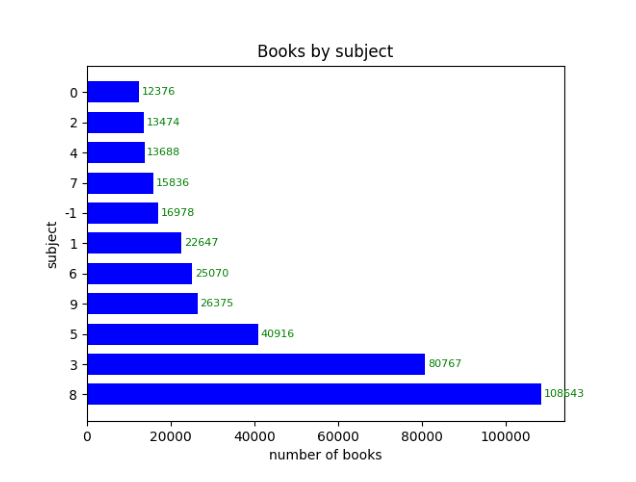

In [55]:
plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()